<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/NN/Quest_Parameters_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The XOR-Model ###

We will build our tiny neural network predicting the XOR-data in keras

First of all, we need to import the libraries

In [1]:
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers


We need to define simple datas.


In [3]:
#Input datasets
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

Now we set up our parameters - and define the model, exactly as in the lecture slides

TODO: Show different way to set up the model, with and without Input layer

In [14]:
# Set up your model here :
X_test = np.concatenate([X_train for i in range(100)])
y_test = np.concatenate([y_train for i in range(100)])

400

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
seed=42


model = Sequential()
#model.add(Dense(4, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.1))
model.add(Dense(48, activation='relu',bias_initializer='zeros',kernel_initializer=keras.initializers.he_normal(seed=seed), input_shape=(X_train.shape[1],)))

model.add(Dense(1, activation='sigmoid'))

model.summary()


# example: start tarining the model up until 30 epochs and plot the training loss values and validation loss values against number of epochs.
epochs = 5


model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.5,momentum=.5), metrics=['accuracy'])
# Fit the model
story = model.fit(X_train, y_train, #name model differently
                    epochs=epochs,
                    verbose=0)
try:
    print(story.history['accuracy'].index(1.0))
except:
    pass
story.history['accuracy'][-1]
#del model


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 48)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 49        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
3


1.0

In [ ]:
predictions=model.predict(X_test)
predictions=np.rint(predictions)
predictions

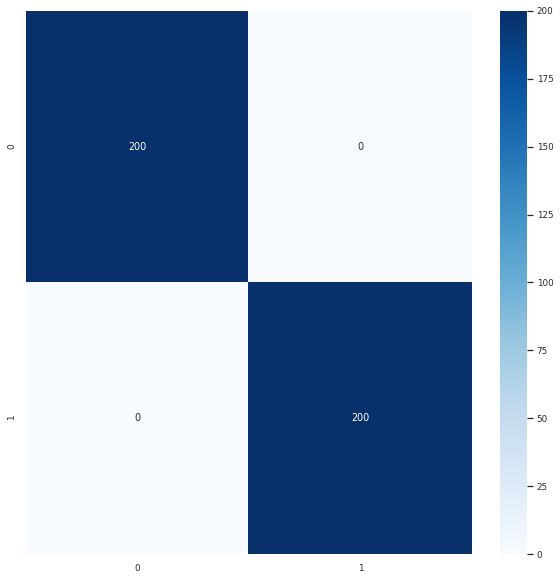

In [28]:
#preds5=results5.best_estimator_.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#yhat=net.predict_classes(X_test)
cm=confusion_matrix(y_test,predictions)
class_names=list(range(2))
import seaborn as sn
import pandas as pd


df_cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize=(10,10))
sn.set(font_scale=.8) # for label size
sn.heatmap(df_cm, annot=True,cmap='Blues',fmt='g') # font size

plt.show()

We already have compiled our model - now we need to train it. We also need to get some predictions in order to see whether our model can indeed predict the XOR-data

In [ ]:
# Train your model here, and predict the XOR-data :


What is wrong with these predictions?



In [ ]:
# Please display predicted values :
model.predict(X_test)


Let's compare the predictions to the true labels, do you notice a "type" difference ?

In [ ]:
# Please dpredictions=np.rint(predictions)
np.rint(model.predict(X_test))

This takes ridicuously long! Let's try to get the training faster. But first of all - and in order to "measure" how long the training takes, implement some code which stores the epoch at which the Neural Network has stably reached 100 percent accuracy. Stably means that the accuracy does not jump back to less then 100 percent. There are keras callbacks - and you could write a custom callback. But for now, you can also write a loop - in which the model is trained for one epoch at every iteration. You should store the accuracies at each epoch in a list in order to be able to visualize them.

Do not alter the cost function!

Hint: Good code style would be to put the model set up into a function and also the code to get the accuracy

You should get someting like this format :
* Epoch 0 / 200    accuracy: 0.5
* Epoch 20 / 200    accuracy: 0.5
* Epoch 40 / 200    accuracy: 0.5
* Epoch 60 / 200    accuracy: 0.5



In [55]:
output=dict(units=1,activation='sigmoid')
output

{'units': 1, 'activation': 'sigmoid'}

In [107]:
# function for model-set-up
from keras.layers import InputLayer
def build_model(optimizer='Adam',lr=.01,momentum=.01,layers=2,hidden=dict(units=2,activation='relu',bias_initializer='zeros',kernel_initializer='he_normal'),input=None,output=dict(units=1,activation='sigmoid'),seed=42):
    model = Sequential()
    #print(f"{hidden['units']},{hidden['activation']}")
    model.add(InputLayer(input_shape=(input.shape[1],)))
    for l in range(layers):
        model.add(Dense(hidden['units'], activation=hidden['activation'],bias_initializer=hidden['bias_initializer'],kernel_initializer=hidden['kernel_initializer']))
    
    model.add(Dense(output['units'], activation=output['activation']))
    # Compile
    if output['units'] == 1:
        loss='binary_crossentropy'
    else:
        loss='categorical_crossentropy'
    #Optimizer
    if optimizer=='SGD':
        model.compile(loss=loss, optimizer=SGD(lr=lr,momentum=momentum), metrics=['accuracy'])
    else:
        model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    
    return model



In [92]:
basemodel = build_model(input=X_train)


In [140]:

def fit_model_and_get_accuracy(model,Xtrain,ytrain,Xtest,ytest,epochs=60):
    #print(traindata[0],traindata[1],valda)
    story = model.fit(Xtrain,ytrain,epochs=epochs,validation_data=(Xtest,ytest),verbose=0)
    try:
        #return f"Reached 1.0 accuracy after {story.history['accuracy'].index(1.0)} epochs"
        return story.history['accuracy']
    except:
        return None


## First Simple Reference Model (hidden_shape = 2, hidden_size = 1)

In [94]:
# Use your fufinctions to execute your script
fit_model_and_get_accuracy(basemodel,X_train,y_train,X_test,y_test)


## More complex models

Okay, now let's get startet. Make a note of your accuracy == 1.0 epoch. It is your baseline. And then try to alter the model so that it trains faster. These are the hyperparameters you need to optimize - but feel free to add others!

1) Hidden size

2) Number of hidden layers

3) Learning rate - just try different numbers 
   What happens if the learning rate is too big?

4) Learning rate - try to decrease it during the training process

5) Different optimizers



For the eager ones: The weights are initialized randomly (within limits) - so if you want better results and insights into the effect of different hyperparameters, you would have to run each experiment a couple of times (i.e. 5 to 10 minimum) and average over them. But you may ignore this in this quest - just bear it in mind!


In [ ]:
# Hidden Size, hidden layers
for size in range(2,50,8):
    for layer in range(4):
        model=build_model(input=X_train, hidden=dict(units=size,activation='relu',bias_initializer='zeros',kernel_initializer='he_normal'),layers=layer)
        
        output=fit_model_and_get_accuracy(model,X_train,y_train,X_test,y_test)
        if not output==None:
            print(f"{layer} layers, {size} neurons",output.index(1.0))

In [145]:
# Learning rate - continuous decrease
outputdf=pd.DataFrame(columns=['Optimizer','Layers','Neurons','Learning rate','Momentum','Epochs','Accuracy'])
# loop through optimizers, neurons (2-8), layers (1-2), learning rate, momentum, fit models and save model meta info and list of accuracies into a pandas dataframe

from keras.optimizers import SGD,Adam,Adamax,Adagrad,RMSprop
for optimizer in ['SGD','Adam','Adamax','Adagrad','RMSprop']:
    print(f"Using {optimizer} optimizer")
    for size in range(2,9,2):
        for layer in range(2):
            for lr in [0.01,0.1,0.5]:
                for momentum in[0.01,0.1,0.5]:
                    model=build_model(input=X_train, hidden=dict(units=size,activation='relu',bias_initializer='zeros',kernel_initializer='he_normal'),layers=layer,optimizer=optimizer, lr=lr, momentum=momentum)
                    output=fit_model_and_get_accuracy(model,X_train,y_train,X_test,y_test)
                    try:
                        print(f"{layer+1} layers, {size} neurons, {lr} learning rate, {momentum} momentum, reached 1.0 accuracy after {output.index(1.0)} epochs")
                        row = pd.Series([optimizer,layer,size,lr,momentum,output.index(1.0),output],index=outputdf.columns)
                        outputdf=outputdf.append(row,ignore_index=True)
                    except:
                        '''
                        # Uncomment the output below to save also models which have not converged to 1.0 accuracy after 60 epochs
                        print(f"{layer+1} layers, {size} neurons, {lr} learning rate, {momentum} momentum has not reached reached 1.0 accuracy after 60 epochs")
                        row = pd.Series([optimizer,layer,size,lr,momentum,None,output],index=outputdf.columns)
                        outputdf=outputdf.append(row,ignore_index=True)
                        '''
                        pass

Using SGD optimizer
2 layers, 4 neurons, 0.1 learning rate, 0.1 momentum, reached 1.0 accuracy after 39 epochs
2 layers, 4 neurons, 0.5 learning rate, 0.01 momentum, reached 1.0 accuracy after 26 epochs
2 layers, 4 neurons, 0.5 learning rate, 0.1 momentum, reached 1.0 accuracy after 10 epochs
2 layers, 4 neurons, 0.5 learning rate, 0.5 momentum, reached 1.0 accuracy after 47 epochs
2 layers, 6 neurons, 0.1 learning rate, 0.01 momentum, reached 1.0 accuracy after 12 epochs
2 layers, 6 neurons, 0.5 learning rate, 0.01 momentum, reached 1.0 accuracy after 43 epochs
2 layers, 6 neurons, 0.5 learning rate, 0.1 momentum, reached 1.0 accuracy after 26 epochs
2 layers, 6 neurons, 0.5 learning rate, 0.5 momentum, reached 1.0 accuracy after 11 epochs
2 layers, 8 neurons, 0.1 learning rate, 0.1 momentum, reached 1.0 accuracy after 10 epochs
2 layers, 8 neurons, 0.1 learning rate, 0.5 momentum, reached 1.0 accuracy after 25 epochs
2 layers, 8 neurons, 0.5 learning rate, 0.01 momentum, reached 1.0 

Now visualize all your learning curves - i.e. nr. of epochs against accuracy. Which hyperparameter did have the biggest effect? 

Hint: In order to do that systematically, you could save the list of accuracies for each experiment and then display them all in one graph (at least for each tuned hyperparameter)

In [146]:
# Here go the plots
outputdf
outputdf.to_csv('model_comparison.csv',sep=';')

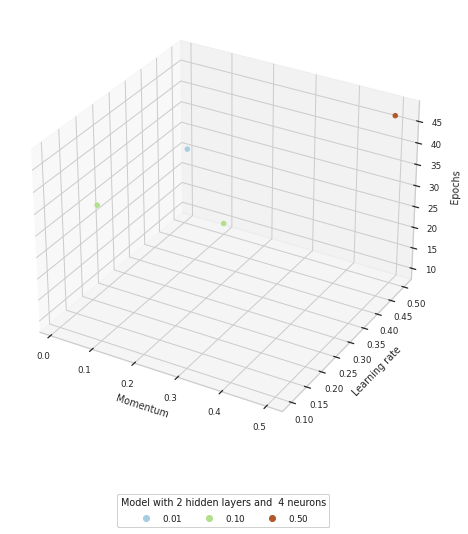

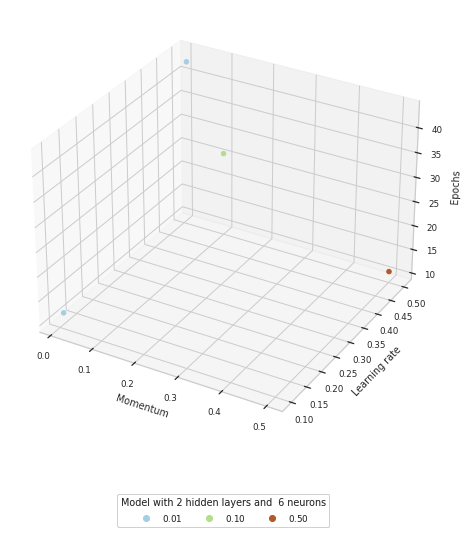

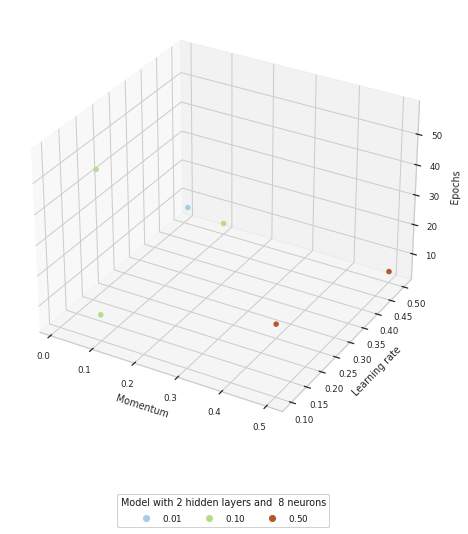

In [175]:
# More plots
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
for neurons in [4,6,8]:
    locdf=outputdf[outputdf['Neurons']==neurons]
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig)
    x = locdf['Momentum']
    y = locdf['Learning rate']
    z = locdf['Epochs']

    g = ax.scatter(x, y, z, c=x, marker='o', depthshade=False, cmap='Paired')
    ax.set_xlabel('Momentum')
    ax.set_ylabel('Learning rate')
    ax.set_zlabel('Epochs')

    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*g.legend_elements(), loc="lower center", title=f"Model with 2 hidden layers and  {neurons} neurons", borderaxespad=-10, ncol=4)
    ax.add_artist(legend)
    plt.show();
    

In [191]:
dict(zip(outputdf.columns[:-1],list(outputdf.iloc[0,:-1])))

{'Optimizer': 'SGD',
 'Layers': 1,
 'Neurons': 4,
 'Learning rate': 0.1,
 'Momentum': 0.1,
 'Epochs': 39}

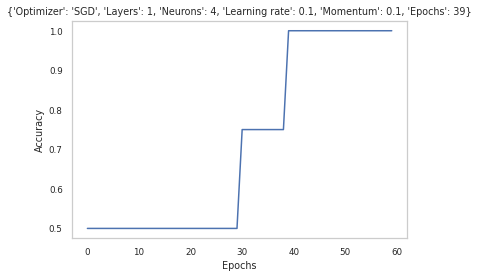

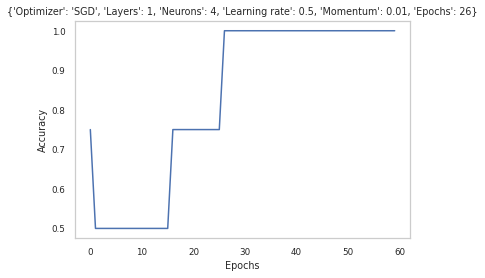

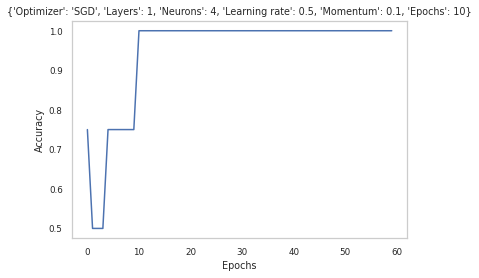

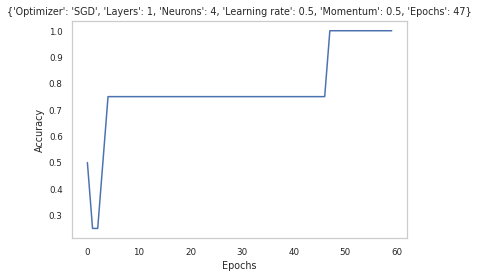

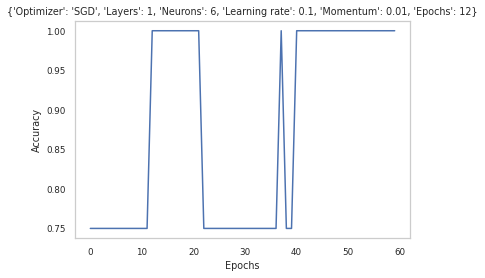

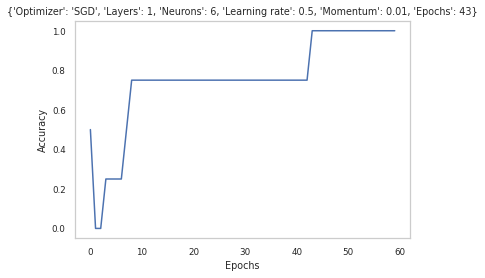

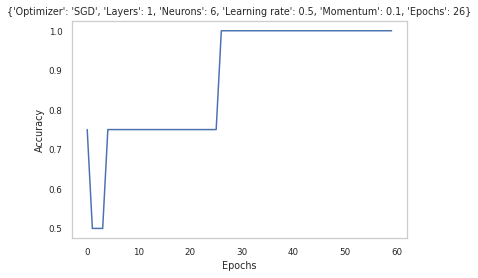

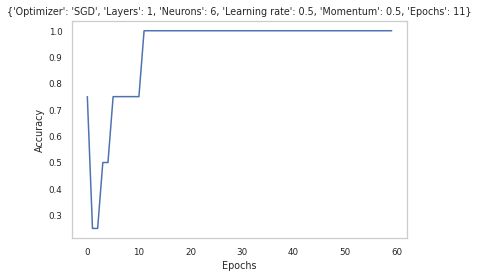

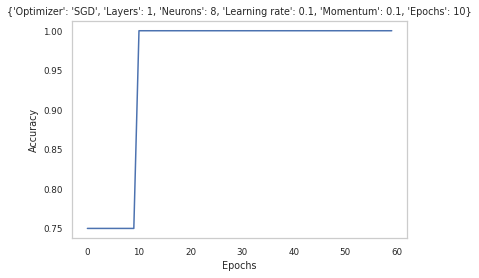

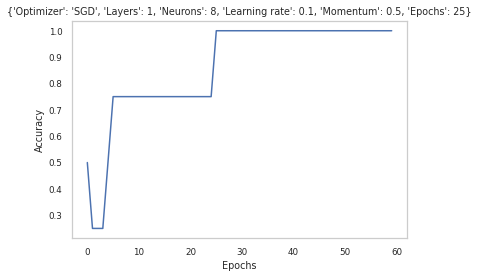

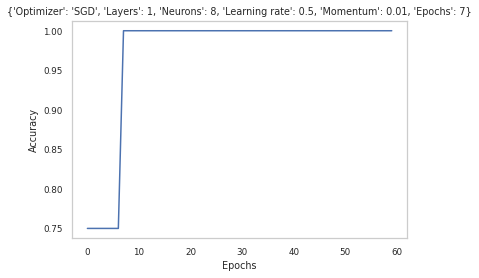

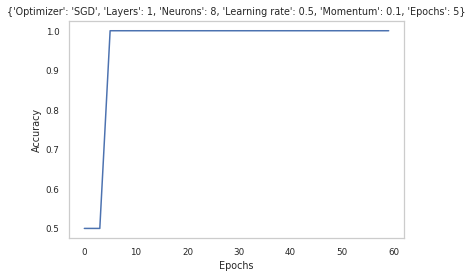

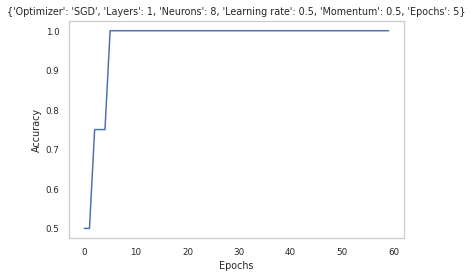

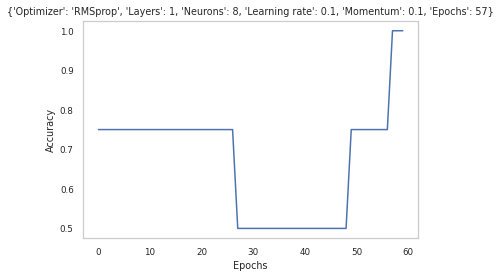

In [197]:
# Add as many plots as you want
# Create a numpy array of the lists of accuracies contained in the column 'Accuracy'
myser=np.array(outputdf['Accuracy'])
# loops through  all rows in the myser series (array)
for r,i in np.ndenumerate(myser):
    #print(i.shape)
    plt.plot(i)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy') 
    # Zipping the model meta info into plot title
    title = dict(zip(outputdf.columns[:-1],list(outputdf.iloc[r[0],:-1])))
    
    plt.title(f"{str(title)}")
    plt.show()

We are still working with mean_squared_error as a cost-function. What would be a more suitable cost function?
- not anymore, MSE cost function for a binary classification is a bad idea...
Alter the cost function and see how fast you get to a stable accuracy of 1.0.


What is your best score (epoch with accuracy == 1.0)?
- 2-5

Can you get the score to under 100? 
- yes

What might be the problem with your best model?
- no problem, all nicely overfitted

#### The outputdf contains only models which converged to accuracy 1.0 within 60 epochs. The  SGD optimizer with  fixed high learning rate (0.1-0.5) works best, the optimizers with variable learning rate did not perform as well, the variable learning rate seemed to result in fluctuating loss/accuracy. This could have perhaps been fixed by setting a high initial learning rate (not included here)